# HW1

In [1]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
syn_graph = nx.Graph()
node_count = 0
langs = wn.langs()

In [3]:

'''
Метод, достающий слова для синсета в параметре для всех языков, которые есть в nltk.
'''

def get_words(syn):
    lemmas = []
    for i in langs:
        lemmas.extend(wn.synset(syn).lemma_names(i))
    return set(lemmas)

'''
Рекурсивный метод для рисования дерева.
'''

def hyp_tree(syns,tree,parent,words):
    global node_count
    tree.add_node(node_count,label=syns.name())
    par = node_count
    syn_words = get_words(syns.name())
    if node_count!=0:
        colex =len(set.intersection(words,syn_words))
        if colex > 0:
            tree.add_edge(parent,node_count,weight = colex) 
    if syns.hyponyms()!=[]:
        for child in syns.hyponyms():
            node_count= node_count+1
            hyp_tree(child,tree,par,syn_words)
    else:
        return()    

Создадим дерево для синсета beat

In [4]:
node_count = 0
cogn = wn.synset('beat.v.01')
syn_graph = nx.Graph()
hyp_tree(cogn,syn_graph,0,set())
atr =nx.get_node_attributes(syn_graph, "label") #словарь с соотнесенными номерами вершин и соответствующими им синсетами

Визуализируем

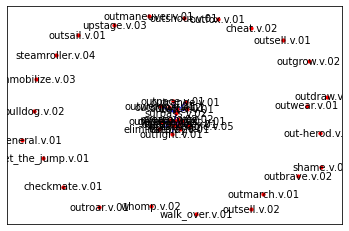

In [5]:
pos = nx.spring_layout(syn_graph)
nx.draw_networkx_nodes(syn_graph, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(syn_graph, pos, edge_color='blue')
nx.draw_networkx_labels(syn_graph,pos,atr, font_size=10)
plt.show()

Получилось слишком плотно, поэтому уберем все висячие вершины

In [6]:
deg=syn_graph.degree()
to_keep = [n for (n, i) in deg if i != 0]
sub=syn_graph.subgraph(to_keep)

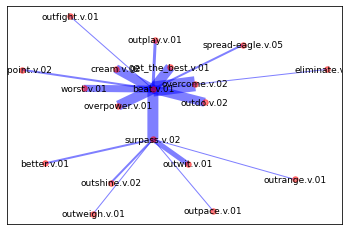

In [7]:
edges = sub.edges()
weights = [sub[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(sub)
nx.draw_networkx_nodes(sub, pos, node_color='red', node_size=30,alpha = 0.5) 
nx.draw_networkx_edges(sub, pos, edge_color='blue',width=weights,alpha = 0.5)
atr =nx.get_node_attributes(sub, "label")
nx.draw_networkx_labels(syn_graph,pos,atr, font_size=9)
plt.show()

Посчитаем количество компонент связанности, плотность и коэффициент ассортативности

In [8]:
print(str.format("количество компонент связанности: {}",nx.number_connected_components(syn_graph)))
print(str.format("плотность: {}", nx.density(syn_graph)))
print(str.format("Коэффициент ассортативности: {}", nx.degree_pearson_correlation_coefficient(syn_graph)))

количество компонент связанности: 25
плотность: 0.019933554817275746
Коэффициент ассортативности: -0.8215527230590961


Вычисление центральных узлов

In [9]:
deg = nx.degree_centrality(sub)
dc = []
for nodeid in sorted(deg, key=deg.get, reverse=True):
    dc.append(atr[nodeid])
deg = nx.eigenvector_centrality(sub)
ec=[]
for nodeid in sorted(deg, key=deg.get, reverse=True):
    ec.append(atr[nodeid])
print(dc[0:6])
print(ec[0:6])

['beat.v.01', 'surpass.v.02', 'cream.v.02', 'eliminate.v.06', 'get_the_best.v.01', 'outdo.v.02']
['beat.v.01', 'surpass.v.02', 'cream.v.02', 'eliminate.v.06', 'get_the_best.v.01', 'outdo.v.02']


Так как граф имеет простую структуру и в нем две вершины имеют степень больше 1, то эти вершины будут центральными при обоих метриках

Выделение в графе сообществ

In [10]:
def node_to_syns(lists_of_nodes):
    com_syns = []
    for com in lists_of_nodes:
        memb_syns =[]
        for memb in com:
            memb_syns.append(atr[memb])
        com_syns.append(memb_syns)
    return(com_syns)

In [11]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(sub)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
comm = sorted(map(sorted, next_level_communities))
print(node_to_syns(comm))
communities_generator = community.kernighan_lin_bisection(sub)
print(node_to_syns(communities_generator))

[['beat.v.01', 'eliminate.v.06', 'get_the_best.v.01', 'outdo.v.02', 'outfight.v.01', 'outplay.v.01', 'outpoint.v.02', 'overcome.v.02', 'overpower.v.01', 'spread-eagle.v.05', 'worst.v.01'], ['cream.v.02'], ['surpass.v.02', 'better.v.01', 'outpace.v.01', 'outrange.v.01', 'outshine.v.02', 'outweigh.v.01', 'outwit.v.01']]
[['beat.v.01', 'cream.v.02', 'get_the_best.v.01', 'outdo.v.02', 'worst.v.01', 'outplay.v.01', 'outpoint.v.02', 'overcome.v.02', 'overpower.v.01'], ['outshine.v.02', 'eliminate.v.06', 'outwit.v.01', 'outweigh.v.01', 'outfight.v.01', 'spread-eagle.v.05', 'surpass.v.02', 'better.v.01', 'outpace.v.01', 'outrange.v.01']]
